# **Foundations of Data Science Fall 2022 - Homework 2 (30 points)**

### Student Name: Tekuri Sai Akhil
### Student Net Id: st5050

---

### **Part 1: Preparing a Training Set and Training a Decision Tree (10 Points)**

---




This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Brightspace).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior:

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise.

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [2]:
# Place your code here
df = pd.read_csv('cell2cell_data.csv')

column_names = df.columns
n = df.shape[0]

# generate indexs of test data
np.random.seed(0)
test_index = []
while len(test_index) < 0.2*n:
    new_index = np.random.randint(0,n)
    if new_index not in test_index:
        test_index.append(new_index)


# build train and test dataframes
train_df = df[~df.index.isin(test_index)]
test_df = df[df.index.isin(test_index)]

print("Complete dataframe shape: "+ str(df.shape))
print("Train dataframe shape: "+ str(train_df.shape))
print("Test dataframe shape: "+ str(test_df.shape))

# train ans test data
X_train, Y_train = train_df.iloc[:,:11], train_df.iloc[:,11]
X_test, Y_test = test_df.iloc[:,:11], test_df.iloc[:,11]
features, target = column_names[:11], column_names[11]

Complete dataframe shape: (39833, 12)
Train dataframe shape: (31866, 12)
Test dataframe shape: (7967, 12)


2\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [3]:
# Place your code here

# Descisiontree training
des_tree = DecisionTreeClassifier(criterion='entropy')
des_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

3\. Using the resulting model from 1.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

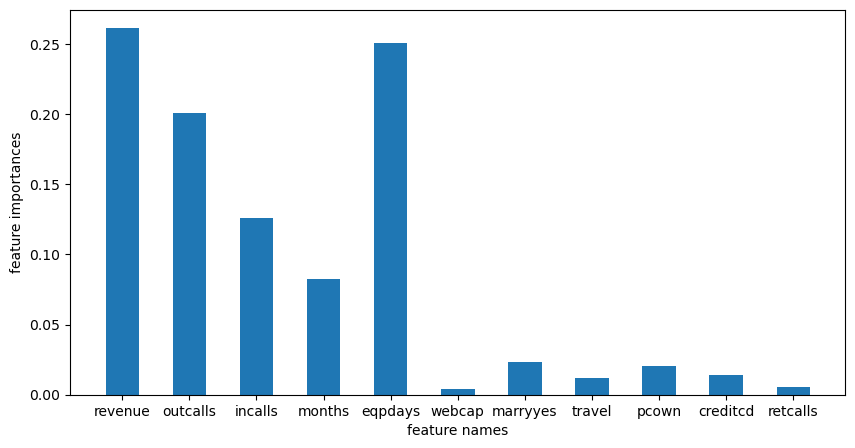

In [4]:
# Place your code here
feature_importances = des_tree.feature_importances_

# Important features plot
fig = plt.figure(figsize = (10, 5))
plt.bar(features, feature_importances, width=0.5)
plt.xlabel("feature names")
plt.ylabel("feature importances")
plt.show()

4\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [5]:
# Place your code here

# Top 3 important features
print("The top three features are:")
print("   1) revenue (Mean monthly revenue in dollars)")
print("   2) eqpdays (Number of days the customer has had his/her current equipment)")
print("   3) outcalls (Mean number of outbound voice calls)\n")


# Correlation between top 3 important features
temp_df = df[['revenue','eqpdays','outcalls']]
corr_coef = np.corrcoef(temp_df.T)
print("Correlation coefficent matrix of top 3 features: ")
print(corr_coef)
print("\nRelationship between top 3 most important features:")
print("   1) The relation between revenue and eqpdays is negative")
print("   2) The relation between revenue and outcalls is positive")
print("   3) The relation between eqpdays and outcalls is negative\n")


print("One can see that these features are not that correlated (|correlation coeff|<0.7). So we can conclude that these 3 drives are independent\n")

print("1) These 3 features are not that correlated to each other. In other words these 3 features are indepandent")
print("2) But while predicting the churndep using desicion trees, these 3 features are more important")
print("3) If revenue is low, eqpdays is high, outcalls is low then that customer is likely to churn")
print("4) If revenue is high, eqpdays is low, outcalls is high then that customer is likely to not churn")


print("\nTo make sense of real-life connection")
print("   1) If the mean monthly revenue in dollars of a customer if low he is likely to churn")
print("   2) If the number of days the customer has had his/her current equipment is high he is likely to churn")
print("   3) If the mean number of outbound voice calls of a customer if low he is likely to churn")

The top three features are:
   1) revenue (Mean monthly revenue in dollars)
   2) eqpdays (Number of days the customer has had his/her current equipment)
   3) outcalls (Mean number of outbound voice calls)

Correlation coefficent matrix of top 3 features: 
[[ 1.         -0.22207391  0.50070896]
 [-0.22207391  1.         -0.24411249]
 [ 0.50070896 -0.24411249  1.        ]]

Relationship between top 3 most important features:
   1) The relation between revenue and eqpdays is negative
   2) The relation between revenue and outcalls is positive
   3) The relation between eqpdays and outcalls is negative

One can see that these features are not that correlated (|correlation coeff|<0.7). So we can conclude that these 3 drives are independent

1) These 3 features are not that correlated to each other. In other words these 3 features are indepandent
2) But while predicting the churndep using desicion trees, these 3 features are more important
3) If revenue is low, eqpdays is high, outcalls is

5\. Using the classifier built in 1.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(2 Points)

In [6]:
# Place your code here

# calculate train accuracy
train_accuracy = des_tree.score(X_train, Y_train)

# calculate test accuracy
test_accuracy = des_tree.score(X_test, Y_test)

print("Train accuracy = "+ str(train_accuracy))
print("Test accuracy = "+ str(test_accuracy))

Train accuracy = 0.9998117115420825
Test accuracy = 0.5392243002384838


### **Part 2 - Finding a Good Decision Tree (Total 10 Points)**


The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf.

(1 Point)

In [7]:
# Place your code here
# 31,866
min_samples_split_list = [] #minimum number of samples required to split an internal node # default 2
min_samples_leaf_list = [] #minimum number of samples required to be at a leaf node # default 1
min_samples_leaf = 150
min_samples_split = 500

# generate 10 values each for min_samples_split and min_samples_leaf
for i in range(10):
    min_samples_leaf_list.append(min_samples_leaf)
    min_samples_leaf = min_samples_leaf + 50
    min_samples_split_list.append(min_samples_split)
    if i==0:
        min_samples_split = min_samples_split + 500
    else:
        min_samples_split = min_samples_split + 1000
        

print("min_samples_leaf_list = "+str(min_samples_leaf_list))
print("min_samples_split_list = "+str(min_samples_split_list))

min_samples_leaf_list = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
min_samples_split_list = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]


2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

1. I want to explore the range from under fitting to overfitting.
2. For small values of min_samples_leaf, min_samples_split the model is prone to overfit (mode nodes/leafs) and For large values of min_samples_leaf, min_samples_split the model is prone to underfit (less nodes/leafs)
3. Since there are 31,866 samples in the train data I picked the min_samples_split range from 500 to 9000 samples and min_samples_leaf from 150 to 600 samples. 
4. Since we we doing for each min_samples_split,min_samples_leaf in the respective ranges. We will be exploring the good cases and worst cases.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

Legend shows the min_samples_leaf values parameter:


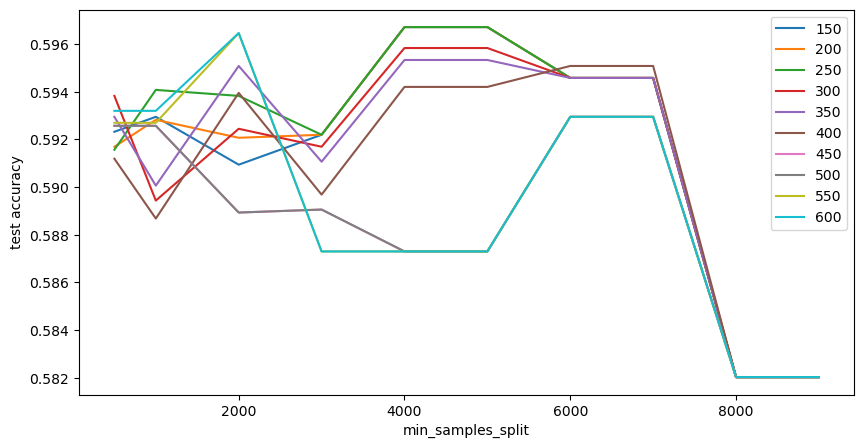

In [8]:
# Place your code here
#min_samples_leaf_list = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
#min_samples_split_list = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

#generate accuracies for each combination of min_samples_leaf and min_samples_split
test_accuracy = []
for min_samples_leaf in min_samples_leaf_list:
    accuracies = []
    for min_samples_split in min_samples_split_list:
        des_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        des_tree.fit(X_train,Y_train)
        accuracies.append(des_tree.score(X_test,Y_test))
    test_accuracy.append(accuracies)

print("Legend shows the min_samples_leaf values parameter:")
    
fig = plt.figure(figsize = (10, 5))
for i in range(10):
    plt.plot(min_samples_split_list, test_accuracy[i])
    
plt.xlabel("min_samples_split")
plt.ylabel("test accuracy")
plt.legend(min_samples_leaf_list, loc ="upper right") 
plt.show()

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

 1. For (min_samples_leaf, min_samples_split) = (250, 4000) we got the best test accuracy.
 2. Best test accuracy obtained is equal to 0.5967

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

1. If we have the data of people who are not customer yet. We can predict the churndep of these people using our model then we can do targeted marketing. When find that a group of people if they becomes a customers, will not churn, then we can market our product to those people and try to make them our customers for better bussiness rather than marketing to everyone.

2. We can do targeted marketing using this model. That's why churn prediction model is good for bussiness.

3. If there is a new customer, we can predict if this customer will churn or not in the future. If the model indicates that the customer will churn we can find ways (incentives) to keep the customer like discounts/rewards etc.

4. Incentivise customers who are prone to churn is one of the way we can use these model to improve churn.

### **Part 3: Model selection with cross-validation (5 points)**


In this part, we will focus on cross-validation to find a good value for parameter `max_depth`.


1\. Write a cross-validation function that does the following:
- Takes as inputs a dataset, a label name, # of splits/folds (`k`), and a sequence of values for the maximum depth of the tree (`max_depth`).
- Shuffles the data.
- Splits the data into `k` folds according to the cross-validation logic
- Performs two loops
  - Outer Loop: `for each f in range(k)`:
    - Inner Loop: `for each value in max_depth_sequence`:
      - Trains a Decision Tree on the training split with the `max_depth=value` (USE criterion='entropy' BUT DO NOT ALTER THE OTHER PARAMETERS)
      - Computes accuracy_value_f on test split
      - Stores accuracy_value_f in a  dictionary of values
- Returns a dictionary, where each key-value pair is: `value:[accuracy_value_1,...,accuracy_value_k]`

(2 Points)

In [9]:
# Place your code here
def xValDecisionTree(dataset, label, k, max_depth_sequence):
    accuracy = {}
    for max_depth in max_depth_sequence:
        accuracy[max_depth] = []
    
    # Shuffle the data
    dataset = dataset.sample(frac = 1,random_state=0)
    
    # K-fold splits
    kf = model_selection.KFold(n_splits=k)
    kfold_indexes = list(kf.split(dataset))
    
    # calculate accuracy_value_f
    for f in range(k):
        for max_depth in max_depth_sequence:
            des_tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
            des_tree.fit(dataset.loc[kfold_indexes[f][0],~dataset.columns.isin([label])], dataset.loc[kfold_indexes[f][0],dataset.columns.isin([label])])
            score = des_tree.score(dataset.iloc[kfold_indexes[f][1],~dataset.columns.isin([label])], dataset.iloc[kfold_indexes[f][1],dataset.columns.isin([label])])
            accuracy[max_depth].append(score)
        
    return accuracy

2\. Using the function written above, do the following:
- Generate a sequence `max_depth_sequence = [None, 2, 4, 8, 16, 32, 128, 256, 512]` (Note that None is the default value for this parameter).
2.	Call accs = xValDecisionTree(dataset, 'churndep', 10, `max_depth_sequence`)
3.  For each value in accs.keys(), calculate mean(accs[value]). What value is associated with the highest accuracy mean?
4.  For each value in accs.keys(), calculate the ranges mean(accs[value]) +/- std(accs[value]). Do the ranges associated with the value that has the highest mean(accs[value]) overlap with ranges for other values? What may this suggest and what are the limitations of a standard deviation based analysis in this scenario?

5.  Which depth value would you pick, if any, and why?

(3 Points)

In [10]:
# Place your code here
max_depth_sequence = [None]
val = 1
for i in range(9):
    val = val*2
    if not val==64:
        max_depth_sequence.append(val)
    
accs = xValDecisionTree(df, 'churndep', 10, max_depth_sequence)

# mean accuracies for each value
for value in accs.keys():
    print("For value = "+str(value)+"; mean(accs[value]) = "+ str(np.mean(accs[value])))

print("\nHigheset mean accuracy is obtained at max_depth/value = 128\n")

# range (mean +/- std) for each value
for value in accs.keys():
    mean = np.mean(accs[value])
    std = np.std(accs[value])
    print("For value = "+str(value)+"; ranges mean(accs[value]) +/- std(accs[value]) = ("+ str(mean-std)+" , "+str(mean+std)+")")

print("\nYou can see the range for value = 128 above")
print("Yes, this range overlaps with the range for values = None, 256, 512")

print("\n1) It suggests that the for max_depth = 128 or 256 or 512, We will get equally good model with some variance")
print("2) Which max_depth gives the high accuracy is highly depend on the input data")
print("3) Standard deviation-based analysis does not directly consider the complexity of the models being evaluated. It treats all models as equally valid, which may not be appropriate in situations where model complexity(max_depth) varies")

print("\nI will pick the value = 128, because of high mean acuracy in 10 fold cross validation")

For value = None; mean(accs[value]) = 0.9090954200936308
For value = 2; mean(accs[value]) = 0.5620983179516964
For value = 4; mean(accs[value]) = 0.573670787846339
For value = 8; mean(accs[value]) = 0.5881312596607872
For value = 16; mean(accs[value]) = 0.6746420908338349
For value = 32; mean(accs[value]) = 0.8688525820580842
For value = 128; mean(accs[value]) = 0.9091707402041003
For value = 256; mean(accs[value]) = 0.9090200873793945
For value = 512; mean(accs[value]) = 0.90922095361108

Higheset mean accuracy is obtained at max_depth/value = 128

For value = None; ranges mean(accs[value]) +/- std(accs[value]) = (0.9041717433023055 , 0.914019096884956)
For value = 2; ranges mean(accs[value]) +/- std(accs[value]) = (0.5388514004991002 , 0.5853452354042926)
For value = 4; ranges mean(accs[value]) +/- std(accs[value]) = (0.5614456676364195 , 0.5858959080562585)
For value = 8; ranges mean(accs[value]) +/- std(accs[value]) = (0.5704899362791237 , 0.6057725830424506)
For value = 16; ranges

### **Part 4: Boosting (5 Points)**


Now, as we covered in class, ensemble methods are often used to improve performance.

1. Implement the boosting algorithm: XGBoost for the same `cell2cell_data.csv` task as above. You will have to select how to tune hyperparameters. Besides depth, which other hyperparametrs do you optimize for? (2 points)

1. Besides depth i've optimised for number of estimators (n_estimators).
2. n_estimators(number of estimaters in Ensemble) is a important parameter in boosting algorithm. So I wanted to see which value of n_estimator is best in boosting.

In [11]:
# Place your code here
xgb_model = xgb.XGBClassifier()

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 4, 8, 16, 32, 64, 128, 256, 512],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, Y_train)

# get best model
best_params = grid_search.best_params_
xgb_model.set_params(**best_params)

#parameters of best model
print(best_params)

#train on best model
xgb_model.fit(X_train, Y_train)
y_pred = xgb_model.predict(X_test)

#test on best model
accuracy = accuracy_score(Y_test, y_pred)
print("Test accuracy of XGBoost = ", accuracy)

{'max_depth': 2, 'n_estimators': 100}
Test accuracy of XGBoost =  0.6028618049453998


2. Now compare the XGBoost performance to the decision tree implementation from part 3. Describe in text how they compare, and if this aligns with what you expect. (3 points)

In [12]:
# Place your code here

#calculate test score for best max_depth obtained in part 3
des_tree = DecisionTreeClassifier(criterion='entropy', max_depth=128)
des_tree.fit(X_train, Y_train)
score = des_tree.score(X_test, Y_test)
print("Accuracy of decision tree of max_depth(=128) = " +str(score))

Accuracy of decision tree of max_depth(=128) = 0.537718087109326


1. Test accuracy of XGBoost optimal model (0.6) is more than Test accuracy of decision tree of max_depth(=128)(0.5)
2. Test accuracy of using boosting algorithm is more than decision tree implementation from part 3
3. This is as expected, because the Ensemble methods is expected to perform better. We can see the improvement in test accuracy while using boosting algorithm.

## End of homework